In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb
import tensorflow as tf
from PIL import Image
import cv2
from tqdm.notebook import tqdm

%cd '/content/drive/My Drive/GitHub Repositories/CXGAN/Cascaded Model/COVID19 CT/Datasets'
!ls

/content/drive/My Drive/GitHub Repositories/CXGAN/Cascaded Model/COVID19 CT/Datasets
COVID19-Diagnosis  COVID19-Mixed  COVID19-Segmentation


In [ ]:
dataDir = './COVID19-Diagnosis/Data 01'
classes = os.listdir(dataDir)
for class_ in classes:
  if class_=='Normal':
    num_normal_scans =  len(os.listdir(dataDir+'/'+class_))
  if class_=='COVID19':
    num_covid_scans =  len(os.listdir(dataDir+'/'+class_))

total_num_scans = num_normal_scans+num_covid_scans
print('Total CT-Scans: {} | Non-COVID Scans: {} | COVID Scans: {}'.format(total_num_scans, num_normal_scans, num_covid_scans))
    

Total CT-Scans: 2481 | Non-COVID Scans: 1229 | COVID Scans: 1252


In [ ]:
dataDir = './COVID19-Diagnosis/Data 01'
classes = os.listdir(dataDir)
for class_ in classes:
  if class_=='Normal':
    normal_images =  os.listdir(dataDir+'/'+class_)
    print('Mode: Diagnosis | Class: {} | Number of Images:{}'.format(class_, len(normal_images)))
    count=0
    for image in tqdm(normal_images):
      count+=1
      img = Image.open(dataDir+'/'+class_+'/'+image)
      img.save('./COVID19-Mixed/Images/0:Normal/Normal_Diagnosis_Data01_{}.png'.format(count))

      
  if class_=='COVID19':
    covid_images =  os.listdir(dataDir+'/'+class_)
    print('Mode: Diagnosis | Class: {} | Number of Images:{}'.format(class_, len(covid_images)))
    count=0
    for image in tqdm(covid_images):
      count+=1
      img = Image.open(dataDir+'/'+class_+'/'+image)
      img.save('./COVID19-Mixed/Images/1:COVID19/COVID19_Diagnosis_Data01_{}.png'.format(count))




Mode: Diagnosis | Class: COVID19 | Number of Images:1252



Mode: Diagnosis | Class: Normal | Number of Images:1229


In [ ]:
dataDir = './COVID19-Segmentation/Data 01'

imagesDir = dataDir+'/'+'Training Images(100 Slices)/images.nii'
masksDir = dataDir+'/'+'Training Masks(100 Slices)/Masks.nii'

images = nb.load(imagesDir).get_fdata()
images = images.astype(np.float64)
masks = nb.load(masksDir).get_fdata()
masks = masks.astype(np.float64)

count=0
for i in range(0, 100, 10):
  plot(images[:, :, i:i+10], masks[:, :, i:i+10])






Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dataDir = './COVID19-Segmentation/Data 01'

imagesDir = dataDir+'/'+'Training Images(100 Slices)/images.nii'
images = nb.load(imagesDir).get_fdata()
count=0
print('Mode: Segmentation | Data: {} | Number of Images:{}'.format('Data01', len(images)))

for i in tqdm(range(images.shape[2])):
  count+=1
  img = cv2.normalize(src=images[:, :, i], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  img = Image.fromarray(img)
  img.save('./COVID19-Mixed/Images/1:COVID19/COVID19_Segmentation_Data01_{}.png'.format(count))




masksDir = dataDir+'/'+'Training Masks(100 Slices)/Masks.nii'
masks = nb.load(masksDir).get_fdata()
count=0
print('Mode: Segmentation | Data: {} | Number of Masks:{}'.format('Data01', len(masks)))

for i in tqdm(range(masks.shape[2])):
  count+=1
  mask = cv2.normalize(src=masks[:, :, i], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  mask = Image.fromarray(mask)
  mask.save('./COVID19-Mixed/Masks/1:COVID19 Masks/COVID19_Segmentation_Data01_{}.png'.format(count))







Mode: Segmentation | Data: Data01 | Number of Images:512



Mode: Segmentation | Data: Data01 | Number of Masks:512


In [ ]:
dataDir = './COVID19-Segmentation/Data 02'

def plot(images, masks):
  plt.figure(1, figsize=(20,20))
  for i in range(images.shape[2]):
    plt.subplot(1, images.shape[2], i+1).set_title('Images # {}' .format(i+1))
    plt.imshow(images[:, :, i], cmap='gray')
  plt.figure(2, figsize=(20,20))
  for i in range(masks.shape[2]):
    plt.subplot(1, masks.shape[2], i+1).set_title('Masks # {}' .format(i+1))
    plt.imshow(masks[:, :, i], cmap='gray')
  plt.show()
  plt.close()
  
imagesDir = dataDir+'/'+'Images(9 Volumes-800 Slices)'
masksDir = dataDir+'/'+'COVID19 Masks(9 Volumes-350 Slices)'

volumes = os.listdir(imagesDir)
for volume in volumes:
  imagesPath = imagesDir+'/'+volume
  images = nb.load(imagesPath).get_fdata()

  masksPath = masksDir+'/'+volume
  masks = nb.load(masksPath).get_fdata()
  print('Images: {} | Masks: {}'.format(images.shape, masks.shape))

Images: (630, 630, 42) | Masks: (630, 630, 42)
Images: (630, 630, 45) | Masks: (630, 630, 45)
Images: (630, 630, 39) | Masks: (630, 630, 39)
Images: (630, 630, 418) | Masks: (630, 630, 418)
Images: (630, 630, 45) | Masks: (630, 630, 45)
Images: (630, 630, 42) | Masks: (630, 630, 42)
Images: (630, 630, 39) | Masks: (630, 630, 39)
Images: (630, 630, 66) | Masks: (630, 630, 66)
Images: (630, 630, 93) | Masks: (630, 630, 93)


In [ ]:
dataDir = './COVID19-Segmentation/Data 02'

def plot(images, masks):
  plt.figure(1, figsize=(20,20))
  for i in range(images.shape[2]):
    plt.subplot(1, images.shape[2], i+1).set_title('Images # {}' .format(i+1))
    plt.imshow(images[:, :, i], cmap='gray')
  plt.figure(2, figsize=(20,20))
  for i in range(masks.shape[2]):
    plt.subplot(1, masks.shape[2], i+1).set_title('Masks # {}' .format(i+1))
    plt.imshow(masks[:, :, i], cmap='gray')
  plt.show()
  plt.close()
  
imagesDir = dataDir+'/'+'Images(9 Volumes-800 Slices)'
masksDir = dataDir+'/'+'COVID19 Masks(9 Volumes-350 Slices)'

volumes = os.listdir(imagesDir)


count=0
total_normal_count=0
total_covid_count=0


for volume in volumes:
  covid_count = 0
  normal_count = 0

  imagesPath = imagesDir+'/'+volume
  images = nb.load(imagesPath).get_fdata()

  masksPath = masksDir+'/'+volume
  masks = nb.load(masksPath).get_fdata()
  for i in range(masks.shape[2]):
    img = cv2.normalize(src=images[:, :, i], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    mask = cv2.normalize(src=masks[:, :, i], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    num_white_pixel = np.sum(mask == 255)
    if num_white_pixel==0:
      normal_count+=1
      count+=1
      img = Image.fromarray(img)
      img.save('./COVID19-Mixed/Images/0:Normal/COVID19_Segmentation_Data02_{}.png'.format(count))

      mask = Image.fromarray(mask)
      mask.save('./COVID19-Mixed/Masks/0:Normal Masks/COVID19_Segmentation_Data02_{}.png'.format(count))
      
    else:
      covid_count+=1
      count+=1
      img = Image.fromarray(img)
      img.save('./COVID19-Mixed/Images/1:COVID19/COVID19_Segmentation_Data02_{}.png'.format(count))

      mask = Image.fromarray(mask)
      mask.save('./COVID19-Mixed/Masks/1:COVID19 Masks/COVID19_Segmentation_Data02_{}.png'.format(count))
      
  print('Mode: Segmentation | Data: {} | Volume: {} | Images-Volume: {} | Masks-Volume: {} | Normal: {} | COVID: {}'.format('Data02', volume, images.shape[2],
                                                                                                                            masks.shape[2], normal_count,
                                                                                                                            covid_count))
  
  total_normal_count+=normal_count
  total_covid_count+=covid_count

print('Normal CT: {} | COVID CT: {}'.format(total_normal_count, total_covid_count))

Mode: Segmentation | Data: Data02 | Volume: 7.nii.gz | Images-Volume: 42 | Masks-Volume: 42 | Normal: 33 | COVID: 9
Mode: Segmentation | Data: Data02 | Volume: 8.nii.gz | Images-Volume: 45 | Masks-Volume: 45 | Normal: 9 | COVID: 36
Mode: Segmentation | Data: Data02 | Volume: 4.nii.gz | Images-Volume: 39 | Masks-Volume: 39 | Normal: 14 | COVID: 25
Mode: Segmentation | Data: Data02 | Volume: 3.nii.gz | Images-Volume: 418 | Masks-Volume: 418 | Normal: 291 | COVID: 127
Mode: Segmentation | Data: Data02 | Volume: 1.nii.gz | Images-Volume: 45 | Masks-Volume: 45 | Normal: 2 | COVID: 43
Mode: Segmentation | Data: Data02 | Volume: 6.nii.gz | Images-Volume: 42 | Masks-Volume: 42 | Normal: 41 | COVID: 1
Mode: Segmentation | Data: Data02 | Volume: 2.nii.gz | Images-Volume: 39 | Masks-Volume: 39 | Normal: 25 | COVID: 14
Mode: Segmentation | Data: Data02 | Volume: 5.nii.gz | Images-Volume: 66 | Masks-Volume: 66 | Normal: 21 | COVID: 45
Mode: Segmentation | Data: Data02 | Volume: 9.nii.gz | Images-Vo

In [ ]:
images = os.listdir('./COVID19-Mixed/Images/1:COVID19')
count=0
for image in images:
  if 'Segmentation_Data01' in image:
    count+=1
print(count)

100


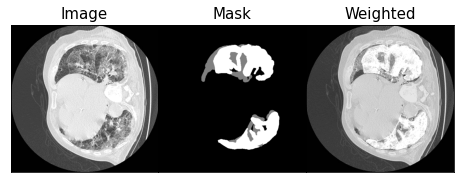

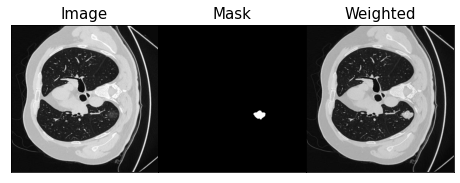

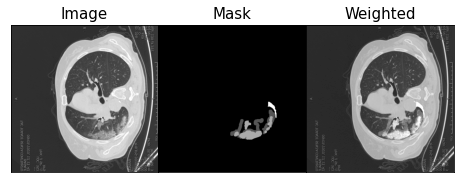

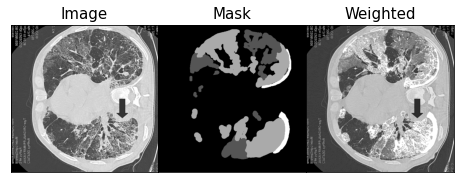

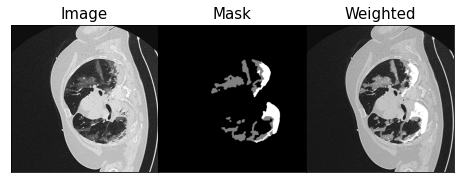

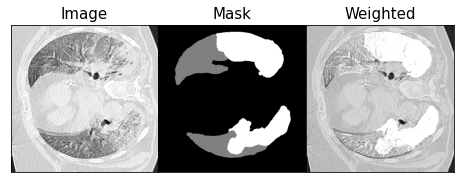

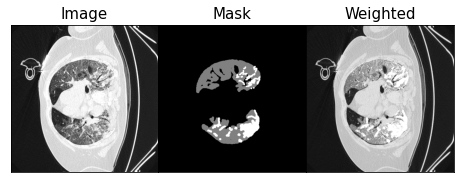

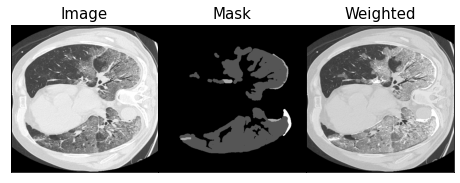

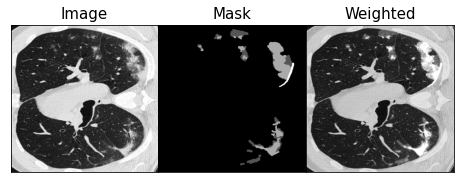

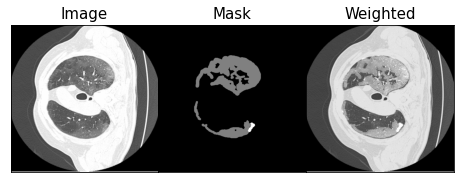

In [43]:
imageDir = './COVID19-Mixed/Images/1:COVID19'
maskDir = './COVID19-Mixed/Masks/1:COVID19 Masks'
imageNames = glob.glob(imageDir+'/COVID19_Segmentation_*.png')
for imageName in imageNames[:10]:
  image = np.array(Image.open(imageName))
  maskName = maskDir+'/'+imageName.rsplit('/', 1)[1]
  mask = np.array(Image.open(maskName))
  weighted = cv2.addWeighted(image, 0.9, mask, 0.5, 0)

  rows = 1
  cols = 3
  fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(6.5, 12.5), squeeze=False, subplot_kw={'xticks': [], 'yticks': []})
  for r in range(rows):
    ax[r][0].imshow(image, cmap='gray')
    ax[r][0].set_title('Image', fontsize=15)

    ax[r][1].imshow(mask, cmap='gray')
    ax[r][1].set_title('Mask', fontsize=15)

    ax[r][2].imshow(weighted, cmap='gray')
    ax[r][2].set_title('Weighted', fontsize=15)
  plt.tight_layout()
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()
  plt.close()
  
